In [21]:
# Import libraries
#pip install sodapy

import requests as res
import pandas as pd
from sodapy import Socrata
import seaborn as sns

### Step 1: Problem statement

PROBLEM: To identify emerging health problems in US amoung adults and to inform development and implementation of effective, targeted public health prevention activities.

SOLUTION: To provide quality health estimates for 500 cities in the US by providing data estimates for 27 measures of chronic disease related to unhealthy behaviors (5), health outcomes (13), and use of preventive services (9) and focus their efforts to improve Health.

DATASOURCE: Data sources used to generate these measures include:

. Behavioral Risk Factor Surveillance System (BRFSS) data (2017, 2016), \n
. Census Bureau 2010 census population data, and
. American Community Survey (ACS) 2013-2017, 2012-2016 estimates
We are using structured dataset we have obtained from CDC website

PREDICTING:Emerging Health Problems in 500 cities in the US.

FEATURES:State, CityName, GeoLocation, Population Count,caterory,measure,Crude Prevalance

TARGET: datavalue

We are using a supervised model and trying to predict using regression model.

we are using multiple features such as the city/census tract, measures of cronic illness,population count to define the target.

### Step 2: Data Acquisition

DataSource : https://chronicdata.cdc.gov/500-Cities-Places/500-Cities-Local-Data-for-Better-Health-2019-relea/6vp6-wxuq

In [20]:
#https://dev.socrata.com/foundry/chronicdata.cdc.gov/6vp6-wxuq
#API to download data
client = Socrata("chronicdata.cdc.gov", None)
results = client.get("6vp6-wxuq", limit = 810200)
chronicdata = pd.DataFrame.from_records(results)
chronicdata.to_csv('500_Cities__Local_Data_for_Better_Health.csv')

In [79]:
#read chronic data
chronicdata_df = pd.read_csv('500_Cities__Local_Data_for_Better_Health.csv')   
chronicdata_df.head()

,Unnamed: 0,year,stateabbr,statedesc,cityname,geographiclevel,datasource,category,uniqueid,measure,...,geolocation,categoryid,measureid,cityfips,tractfips,short_question_text,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8,data_value_footnote_symbol,data_value_footnote
0,0,2017,CA,California,Hawthorne,Census Tract,BRFSS,Health Outcomes,0632548-06037602504,Arthritis among adults aged >=18 Years,...,"{'latitude': '33.905547923', 'longitude': '-11...",HLTHOUT,ARTHRITIS,632548.0,6.037603e+09,Arthritis,8.0,1195.0,NaN,NaN
1,1,2017,CA,California,Hawthorne,City,BRFSS,Unhealthy Behaviors,0632548,Current smoking among adults aged >=18 Years,...,"{'latitude': '33.914667701', 'longitude': '-11...",UNHBEH,CSMOKING,632548.0,NaN,Current Smoking,8.0,1195.0,NaN,NaN
2,2,2017,CA,California,Hayward,City,BRFSS,Health Outcomes,0633000,Coronary heart disease among adults aged >=18 ...,...,"{'latitude': '37.6329591551', 'longitude': '-1...",HLTHOUT,CHD,633000.0,NaN,Coronary Heart Disease,8.0,1141.0,NaN,NaN
3,3,2017,CA,California,Hayward,City,BRFSS,Unhealthy Behaviors,0633000,Obesity among adults aged >=18 Years,...,"{'latitude': '37.6329591551', 'longitude': '-1...",UNHBEH,OBESITY,633000.0,NaN,Obesity,8.0,1141.0,NaN,NaN
4,4,2017,CA,California,Hemet,City,BRFSS,Prevention,0633182,Cholesterol screening among adults aged >=18 Y...,...,"{'latitude': '33.7352277311', 'longitude': '-1...",PREVENT,CHOLSCREEN,633182.0,NaN,Cholesterol Screening,8.0,1177.0,NaN,NaN


### Step 3: Data Dictionary

In [ ]:
| original column name       | column name           | description                       | datatype   |
|----------------------------|-----------------------|-----------------------------------|------------|
| Year                       | year                  | year                              | int        |
| StateAbbr                  | state                 | state abbrevation                 | string     |
| StateDesc                  | state_name            | state name                        | string     |
| CityName                   | city_name             | city name                         | string     |
| GeographicalLevel          | geographical_level    | US/City/Census Tract              | string     |
| DataSource                 | data_source           | data_source                       | string     |
| Category                   | category              | topic                             | string     |
| UniqueId                   | unique_id             | cityFIPS/tractFIPS                | string     |
| Measure                    | measure               | measure full name                 | string     |
| Data_Value_Unit            | unit                  | data value unit % for percent     | string     |
| DataValueTypeID            | data_type_id          | identifier for data value type    | string     |
| Data_Value_Type            | data_type             | data type                         | string     |
| Data_Value                 | data                  | data value                        | int        |
| Low_Confidence_Limit       | low_confidence_limit  | low confidence limit              | int        |
| High_Confidence_Limit      | high_confidence_limit | high confidence limit             | int        |
| Data_Value_Footnote_Symbol | footnote_symbol       | footnote symbol                   | string     |
| Data_Value_Footnote        | footnote_text         | footnote text                     | string     |
| PopulationCount            | population_count      | population count from census 2020 | int        |
| GeoLocation                | geolocation           | latitude and longitude            | dictionary |
| CategoryID                 | category              | identifier for topic              | string     |
| MeasureID                  | measure               | measure identifier                | string     |
| cityFIPS                   | city_fips             | FIPS code                         | string     |
| TractFIPS                  | tract_fips            | FIPS code                         | string     |
| Short_Question_Text        | measure_name          | measure short name                | string     |

### Step 5: Data cleaning

In [80]:
chronicdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810103 entries, 0 to 810102
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   810103 non-null  int64  
 1   year                         810103 non-null  int64  
 2   stateabbr                    810103 non-null  object 
 3   statedesc                    810103 non-null  object 
 4   cityname                     810047 non-null  object 
 5   geographiclevel              810103 non-null  object 
 6   datasource                   810103 non-null  object 
 7   category                     810103 non-null  object 
 8   uniqueid                     810103 non-null  object 
 9   measure                      810103 non-null  object 
 10  data_value_unit              810103 non-null  object 
 11  datavaluetypeid              810103 non-null  object 
 12  data_value_type              810103 non-null  object 
 13 

In [81]:
#drop US records
chronicdata_df.drop(chronicdata_df.index[chronicdata_df['stateabbr'] == 'US'], inplace = True)

In [82]:
#Select only Census track data
chronicdata_df.drop(chronicdata_df.index[chronicdata_df['geographiclevel'] != 'Census Tract'], inplace = True)

In [83]:
#Select only CrdPrv data
chronicdata_df.drop(chronicdata_df.index[chronicdata_df['datavaluetypeid'] != 'CrdPrv'], inplace = True)

In [84]:
#Select only Unhealthy Behaviors data
chronicdata_df.drop(chronicdata_df.index[chronicdata_df['category'] != 'Unhealthy Behaviors'], inplace = True)

In [85]:
chronicdata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140020 entries, 19 to 810101
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   140020 non-null  int64  
 1   year                         140020 non-null  int64  
 2   stateabbr                    140020 non-null  object 
 3   statedesc                    140020 non-null  object 
 4   cityname                     140020 non-null  object 
 5   geographiclevel              140020 non-null  object 
 6   datasource                   140020 non-null  object 
 7   category                     140020 non-null  object 
 8   uniqueid                     140020 non-null  object 
 9   measure                      140020 non-null  object 
 10  data_value_unit              140020 non-null  object 
 11  datavaluetypeid              140020 non-null  object 
 12  data_value_type              140020 non-null  object 
 13

In [74]:
chronicdata_df = chronicdata_df[chronicdata_df.data_value.notnull()]

In [87]:
chronicdata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140020 entries, 19 to 810101
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   140020 non-null  int64  
 1   year                         140020 non-null  int64  
 2   stateabbr                    140020 non-null  object 
 3   statedesc                    140020 non-null  object 
 4   cityname                     140020 non-null  object 
 5   geographiclevel              140020 non-null  object 
 6   datasource                   140020 non-null  object 
 7   category                     140020 non-null  object 
 8   uniqueid                     140020 non-null  object 
 9   measure                      140020 non-null  object 
 10  data_value_unit              140020 non-null  object 
 11  datavaluetypeid              140020 non-null  object 
 12  data_value_type              140020 non-null  object 
 13

In [88]:
chronicdata = chronicdata_df[['year','stateabbr','cityname','category','measureid','data_value','populationcount']]
chronicdata.head()

,year,stateabbr,cityname,category,measureid,data_value,populationcount
19,2017,AL,Huntsville,Unhealthy Behaviors,OBESITY,30.3,2654
27,2017,AZ,Avondale,Unhealthy Behaviors,OBESITY,30.6,3978
45,2017,CA,Alhambra,Unhealthy Behaviors,OBESITY,17.3,5447
74,2017,CA,Escondido,Unhealthy Behaviors,CSMOKING,12.7,4254
85,2017,CA,Garden Grove,Unhealthy Behaviors,BINGE,14.2,5866


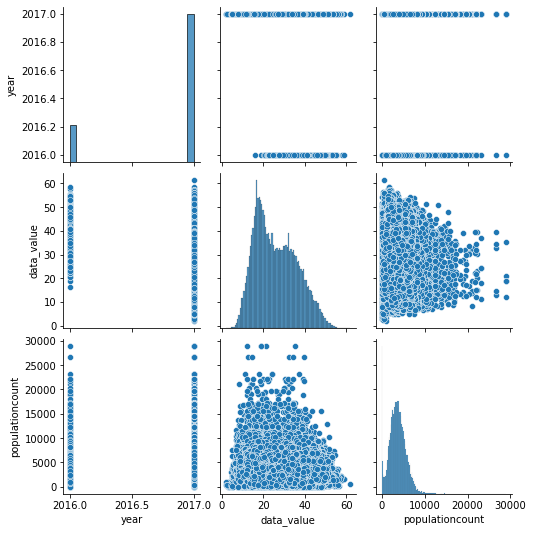

In [89]:
sns.pairplot(chronicdata)

In [90]:
chronicdata = pd.get_dummies(chronicdata, 
                     columns = ['measureid'])
chronicdata.head()

,year,stateabbr,cityname,category,data_value,populationcount,measureid_BINGE,measureid_CSMOKING,measureid_LPA,measureid_OBESITY,measureid_SLEEP
19,2017,AL,Huntsville,Unhealthy Behaviors,30.3,2654,0,0,0,1,0
27,2017,AZ,Avondale,Unhealthy Behaviors,30.6,3978,0,0,0,1,0
45,2017,CA,Alhambra,Unhealthy Behaviors,17.3,5447,0,0,0,1,0
74,2017,CA,Escondido,Unhealthy Behaviors,12.7,4254,0,1,0,0,0
85,2017,CA,Garden Grove,Unhealthy Behaviors,14.2,5866,1,0,0,0,0


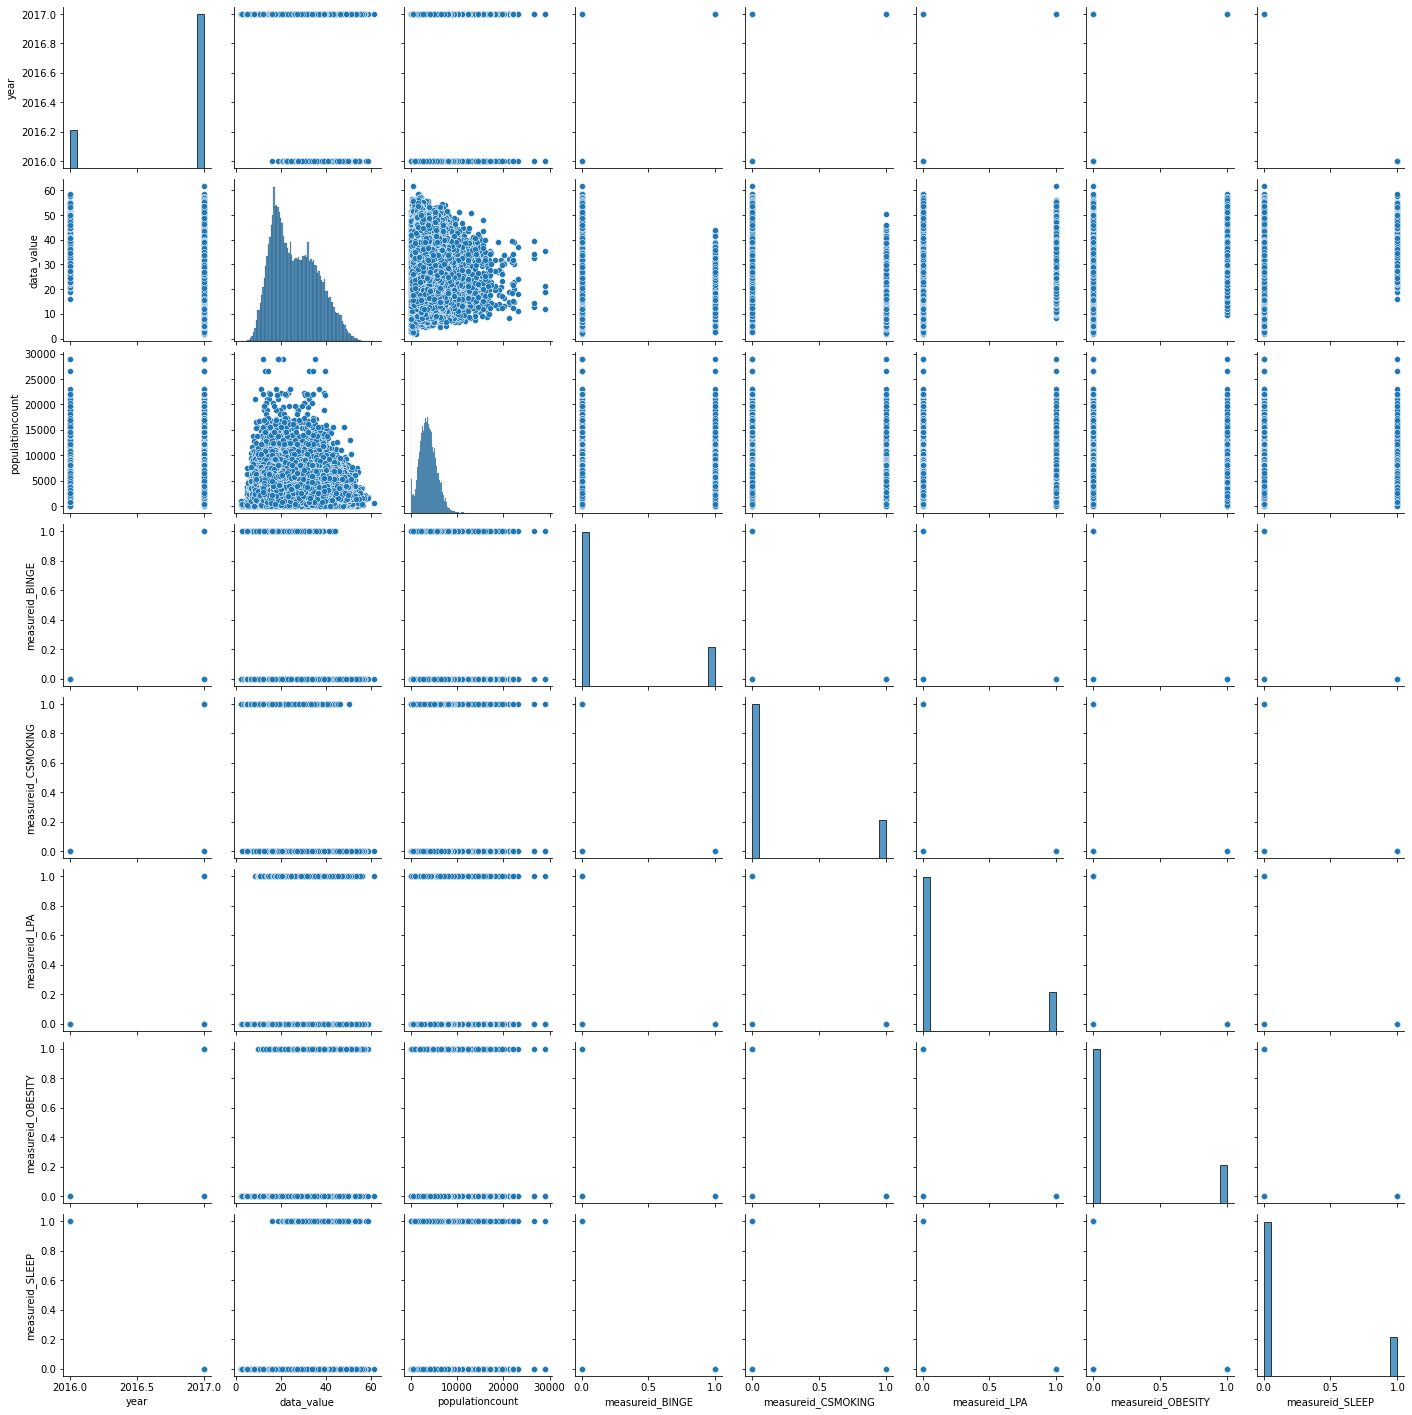

In [91]:
sns.pairplot(chronicdata)